<a href="https://colab.research.google.com/github/Narayan-21/Tensorflow_tutorials/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 26s 13ms/step - loss: 0.4971 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3740 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3350 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3128 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2964 - accuracy: 0.8896
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2806 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2682 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2551 - accuracy: 0.9052
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2477 - accuracy: 0.9065
Epoch 10/10
1875/

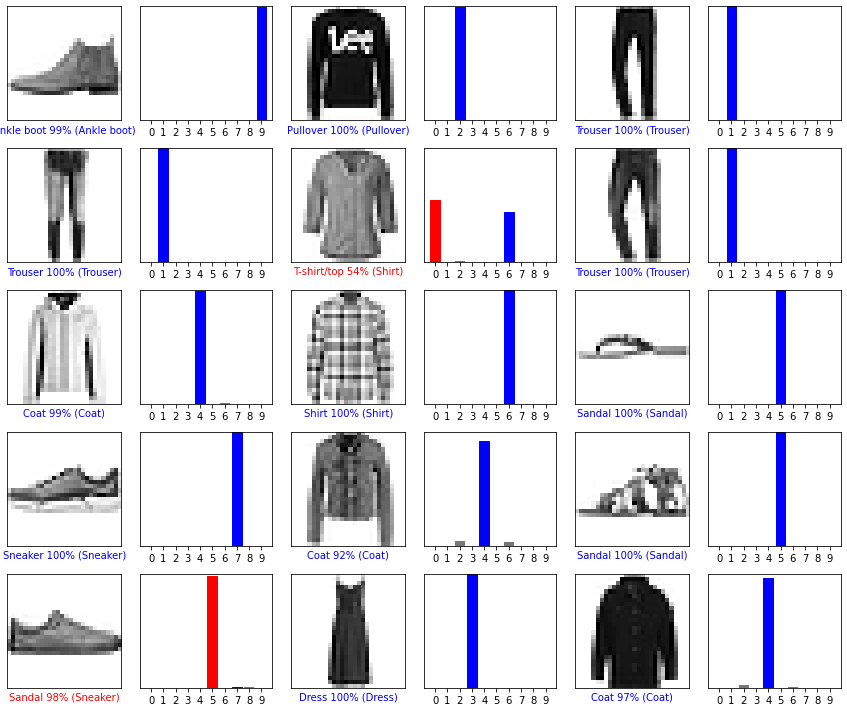

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Loading Data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images/255.0
test_images = test_images/255.0

# Build the Model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile the Model
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

# Train the Model
model.fit(train_images, train_labels, epochs=10)

# Evaluate the Accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test Accuracy: ', test_acc)

probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
np.argmax(predictions[0])

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()